## Main Objective:

In [710]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [711]:
filename = 'data/churndata.pkl'

In [712]:
data = pd.read_pickle(filename)

In [713]:
data.shape

(7043, 21)

In [714]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,32.386767,24.542061,1.00,9.00,29.00,55.000,72.00
gb_mon,7043.0,20.515405,20.418940,0.00,3.00,17.00,27.000,85.00
monthly,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.850,118.75
total_revenue,7043.0,3034.379056,2865.204542,21.36,605.61,2108.64,4801.145,11979.34
satisfaction,7043.0,3.244924,1.201657,1.00,3.00,3.00,4.000,5.00
churn_value,7043.0,0.265370,0.441561,0.00,0.00,0.00,1.000,1.00
churn_score,7043.0,58.505040,21.170031,5.00,40.00,61.00,75.500,96.00
cltv,7043.0,4400.295755,1183.057152,2003.00,3469.00,4527.00,5380.500,6500.00


In [715]:
data.churn_score

0       91
1       69
2       81
3       88
4       67
        ..
7038    45
7039    59
7040    71
7041    59
7042    38
Name: churn_score, Length: 7043, dtype: int64

In [716]:
data.head().T

,0,1,2,3,4
id,8779-QRDMV,7495-OOKFY,1658-BYGOY,4598-XLKNJ,4846-WHAFZ
months,1,8,18,25,37
offer,None,Offer E,Offer D,Offer C,Offer C
phone,No,Yes,Yes,Yes,Yes
multiple,No,Yes,Yes,No,Yes
internet_type,DSL,Fiber Optic,Fiber Optic,Fiber Optic,Fiber Optic
gb_mon,8,17,52,12,14
security,No,No,No,No,No
backup,No,Yes,No,Yes,No
protection,Yes,No,No,Yes,No


In [717]:
data.id.nunique()#This number shows that each id is unique

7043

In [718]:
data.dtypes.value_counts()

object     13
int64       6
float64     2
dtype: int64

## Brief Description:

**The dataset is from a telecommunication company. It has 20 features that desribe the various aspects of a customer's relation with the telecom company such as the customer ID, the typre of internet connection, the duration for which the person has been a customer with the company etc.. There is one target column called the churn score that tells us whether or not the customer has left the company or not.** 

---

## Data Exploration:

**The dataset contains 7043 rows of data, each of which represents a unique customer. There are 21 columns, of which 13 are categorical, 6 are integer and 2 are float type. 
There are no empty cells in the dataset, so we don't have to deal with any missing values.**

**We then look at the number of unique values for each column.**

In [719]:
data_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns = ['Variable', 'Unique Values']).set_index('Variable')

In [720]:
data_uniques.T

Variable,id,months,offer,phone,multiple,internet_type,gb_mon,security,backup,protection,...,unlimited,contract,paperless,payment,monthly,total_revenue,satisfaction,churn_value,churn_score,cltv
Unique Values,7043,72,6,2,2,4,50,2,2,2,...,2,3,2,3,1585,6996,5,2,81,3438


**We drop the 'id' column because it has unique values for every cell.**

In [721]:
data = data.drop('id', axis = 1)

**We now look at the outliers in the two floatcolumns.**

In [722]:
mask = data.dtypes == np.float64

In [723]:
mask

months           False
offer            False
phone            False
multiple         False
internet_type    False
gb_mon           False
security         False
backup           False
protection       False
support          False
unlimited        False
contract         False
paperless        False
payment          False
monthly           True
total_revenue     True
satisfaction     False
churn_value      False
churn_score      False
cltv             False
dtype: bool

In [724]:
float_variables = ['monthly', 'total_revenue']

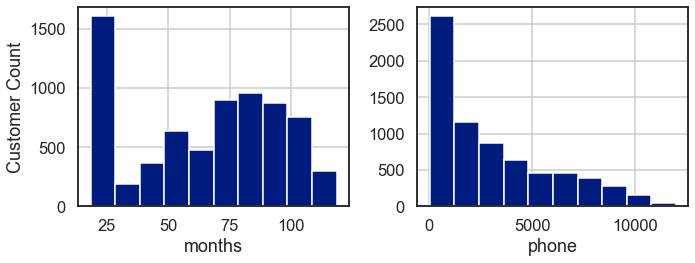

In [725]:
sns.set_context('talk')
sns.set_palette('dark')
fig, (fig_list) = plt.subplots(1, 2, figsize=(10, 4))

for i in range(2):
    data[float_variables[i]].hist(ax=fig_list[i%2])
    fig_list[i%5].set(xlabel = int_columns[i])
    fig_list[0].set(ylabel = 'Customer Count')
fig.tight_layout()

**Both the histogams don't have any outliers that we need to remove from our dataset since the values are continuous.**

**We import the 3 types of encoding methods we shall be use**

In [727]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
lb = LabelBinarizer()
le = LabelEncoder()
oe = OrdinalEncoder()

**We first pick out the binary categorical columns.**

In [728]:
binary_variables = list(data_uniques[data_uniques['Unique Values'] == 2].index)

In [729]:
binary_variables

['phone',
 'multiple',
 'security',
 'backup',
 'protection',
 'support',
 'unlimited',
 'paperless',
 'churn_value']

In [730]:
for column in binary_variables:
    data[column] = lb.fit_transform(data[column])

In [731]:
data

,months,offer,phone,multiple,internet_type,gb_mon,security,backup,protection,support,unlimited,contract,paperless,payment,monthly,total_revenue,satisfaction,churn_value,churn_score,cltv
0,1,None,0,0,DSL,8,0,0,1,0,0,Month-to-Month,1,Bank Withdrawal,39.65,59.65,3,1,91,5433
1,8,Offer E,1,1,Fiber Optic,17,0,1,0,0,1,Month-to-Month,1,Credit Card,80.65,1024.10,3,1,69,5302
2,18,Offer D,1,1,Fiber Optic,52,0,0,0,0,1,Month-to-Month,1,Bank Withdrawal,95.45,1910.88,2,1,81,3179
3,25,Offer C,1,0,Fiber Optic,12,0,1,1,0,1,Month-to-Month,1,Bank Withdrawal,98.50,2995.07,2,1,88,5337
4,37,Offer C,1,1,Fiber Optic,14,0,0,0,0,1,Month-to-Month,1,Bank Withdrawal,76.50,3102.36,2,1,67,2793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,None,1,0,None,0,0,0,0,0,0,Two Year,1,Bank Withdrawal,21.15,3039.53,5,0,45,5306
7039,24,Offer C,1,1,Cable,24,1,0,1,1,1,One Year,1,Mailed Check,84.80,2807.47,3,0,59,2140
7040,72,None,1,1,Fiber Optic,59,0,1,1,0,1,One Year,1,Credit Card,103.20,9453.04,4,0,71,5560
7041,11,None,0,0,DSL,17,1,0,0,0,1,Month-to-Month,1,Bank Withdrawal,29.60,319.21,4,0,59,2793


**Let's look at the remaining categorical columns now:**

In [732]:
mask = data.dtypes == object

In [733]:
for i in data.columns[mask]:
    print(i, data[i].unique())

offer ['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']
internet_type ['DSL' 'Fiber Optic' 'Cable' 'None']
contract ['Month-to-Month' 'One Year' 'Two Year']
payment ['Bank Withdrawal' 'Credit Card' 'Mailed Check']


**The 'contract' column is the only one that is categorical and ordinal.**

In [734]:
X = [['Month-to-Month', 'One Year', 'Two Year']]

In [735]:
oe = OrdinalEncoder(categories = X)

In [736]:
data['contract'] = oe.fit_transform(data[['contract']])

In [737]:
data[data.columns[mask]].columns

Index(['offer', 'internet_type', 'contract', 'payment'], dtype='object')

**Now we use one-hot encoding for the 3 remaining categorical columns: 'offer', 'internet' and 'payment'.**

In [738]:
ohc_cols = ['offer', 'internet_type', 'payment']

In [739]:
data = pd.get_dummies(data, columns = ohc_cols, drop_first = True)

In [740]:
data

,months,phone,multiple,gb_mon,security,backup,protection,support,unlimited,contract,...,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,payment_Credit Card,payment_Mailed Check
0,1,0,0,8,0,0,1,0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,8,1,1,17,0,1,0,0,1,0.0,...,0,0,0,0,1,0,1,0,1,0
2,18,1,1,52,0,0,0,0,1,0.0,...,0,0,0,1,0,0,1,0,0,0
3,25,1,0,12,0,1,1,0,1,0.0,...,0,0,1,0,0,0,1,0,0,0
4,37,1,1,14,0,0,0,0,1,0.0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,1,0,0,0,0,0,0,0,2.0,...,0,0,0,0,0,0,0,1,0,0
7039,24,1,1,24,1,0,1,1,1,1.0,...,0,0,1,0,0,0,0,0,0,1
7040,72,1,1,59,0,1,1,0,1,1.0,...,0,0,0,0,0,0,1,0,1,0
7041,11,0,0,17,1,0,0,0,1,0.0,...,0,0,0,0,0,1,0,0,0,0


In [741]:
data.dtypes.value_counts()

uint8      10
int32       9
int64       5
float64     3
dtype: int64

In [742]:
mask = (data.dtypes == np.uint8) | (data.dtypes== np.int32) | (data.dtypes == np.int64)
int_columns = data.columns[mask]

In [743]:
pd.DataFrame([[i, data[i].nunique()] for i in int_columns], columns = ['Variable', 'Num Unique Elements'])

,Variable,Num Unique Elements
0,months,72
1,phone,2
2,multiple,2
3,gb_mon,50
4,security,2
5,backup,2
6,protection,2
7,support,2
8,unlimited,2
9,paperless,2


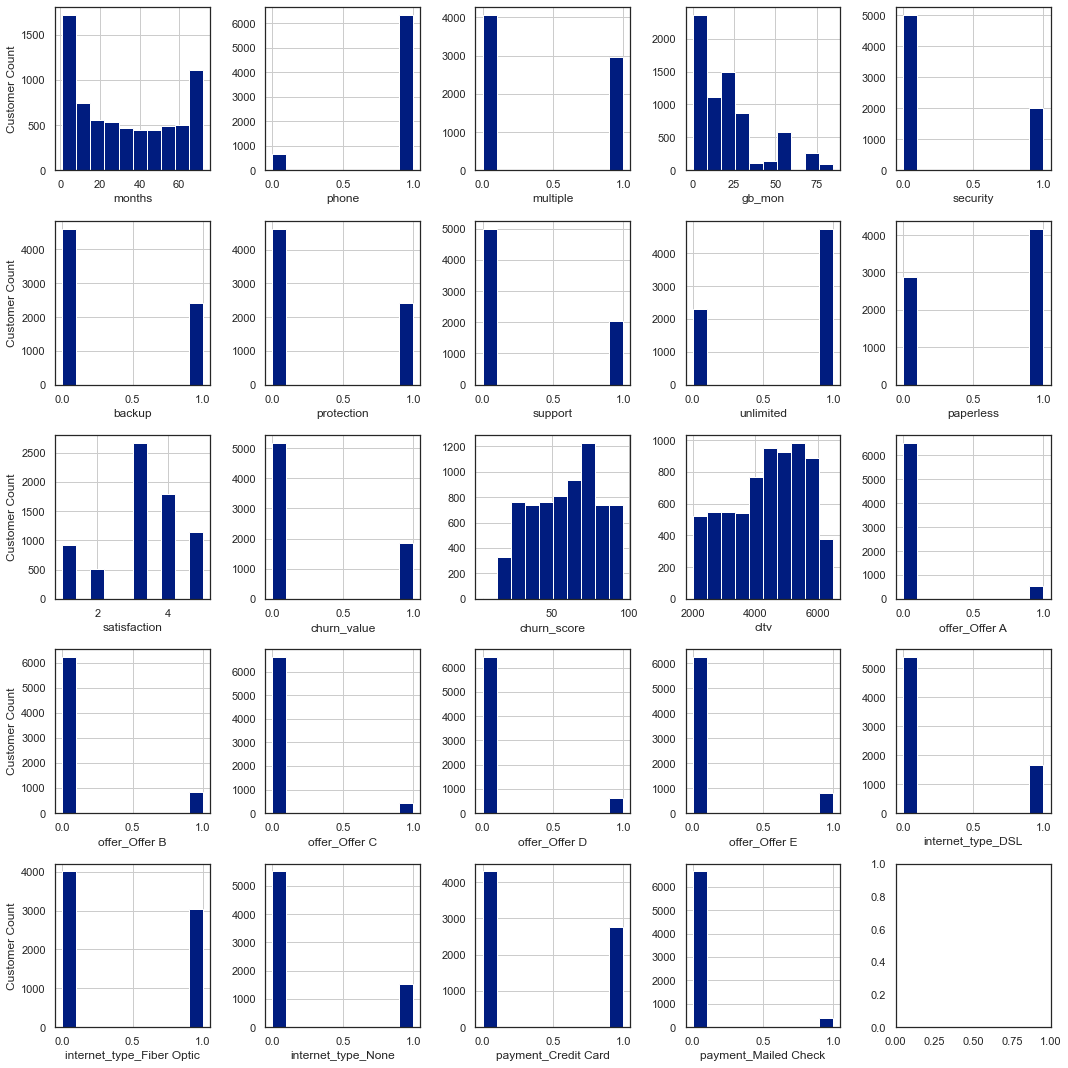

In [744]:
fig, (fig_list) = plt.subplots(5, 5, figsize=(15, 15))

for i in range(24):
    data[int_columns[i]].hist(ax=fig_list[i//5][i%5])
    fig_list[i//5][i%5].set(xlabel = int_columns[i])
    fig_list[i//5][0].set(ylabel = 'Customer Count')
fig.tight_layout()

**After looking at the histograms we decide that there are no serious outliers that need oto be removed from our dataset.**

**Now we use the minmax scaler to scale all our columns**

In [745]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [746]:
for column in data.columns:
    data[column] = minmax.fit_transform(data[[column]])

In [747]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.442067,0.345663,0.0,0.112676,0.394366,0.760563,1.0
phone,7043.0,0.903166,0.295752,0.0,1.000000,1.000000,1.000000,1.0
multiple,7043.0,0.421837,0.493888,0.0,0.000000,0.000000,1.000000,1.0
gb_mon,7043.0,0.241358,0.240223,0.0,0.035294,0.200000,0.317647,1.0
security,7043.0,0.286668,0.452237,0.0,0.000000,0.000000,1.000000,1.0
backup,7043.0,0.344881,0.475363,0.0,0.000000,0.000000,1.000000,1.0
protection,7043.0,0.343888,0.475038,0.0,0.000000,0.000000,1.000000,1.0
support,7043.0,0.290217,0.453895,0.0,0.000000,0.000000,1.000000,1.0
unlimited,7043.0,0.673719,0.468885,0.0,0.000000,1.000000,1.000000,1.0
contract,7043.0,0.377396,0.424234,0.0,0.000000,0.000000,1.000000,1.0


**We now look at the pairplots of the various columns to get a better idea of our dataset.**

In [748]:
pp_features = ['months', 'phone', 'multiple', 'gb_mon', 'total_revenue','satisfaction' ,'cltv', 'churn_score', 'churn_value']

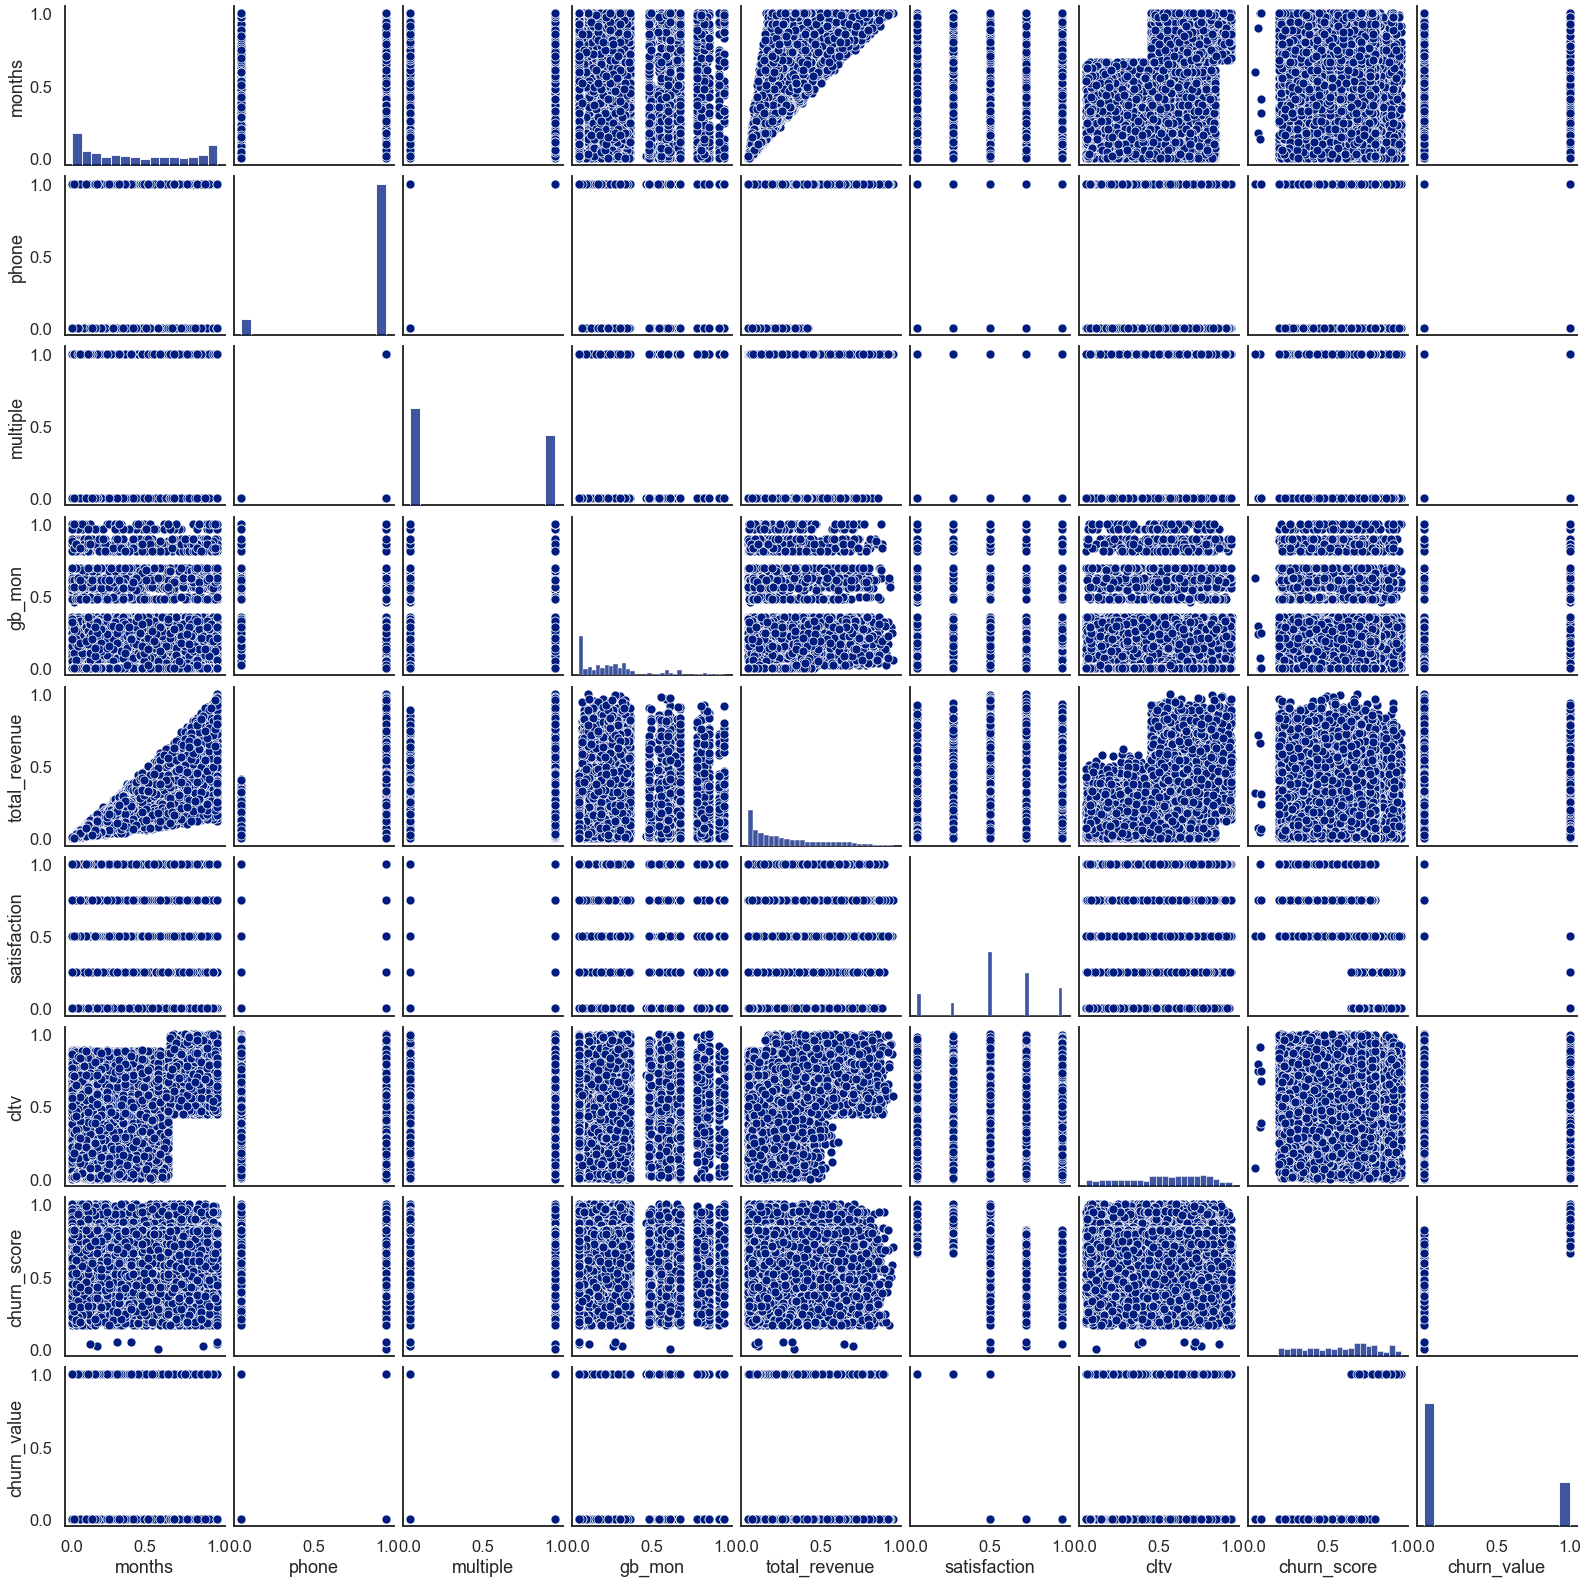

In [749]:
from colorsetup import colors, palette
sns.set_context('talk')
#sns.set_palette(palette)
sns.set_style('white')
#sns.set_context('notebook')
sns.set_palette('dark')
sns.pairplot(data[pp_features], plot_kws = dict(alpha = 1.0))

**From the pairplot we see that a high satisfaction score is a strong predictor that the customer will not churn and vice-versa. Moreover, the churn_score is strongly related to the churn_value which indicates that the company's metric of predicting who will stay and who will leave is good.**

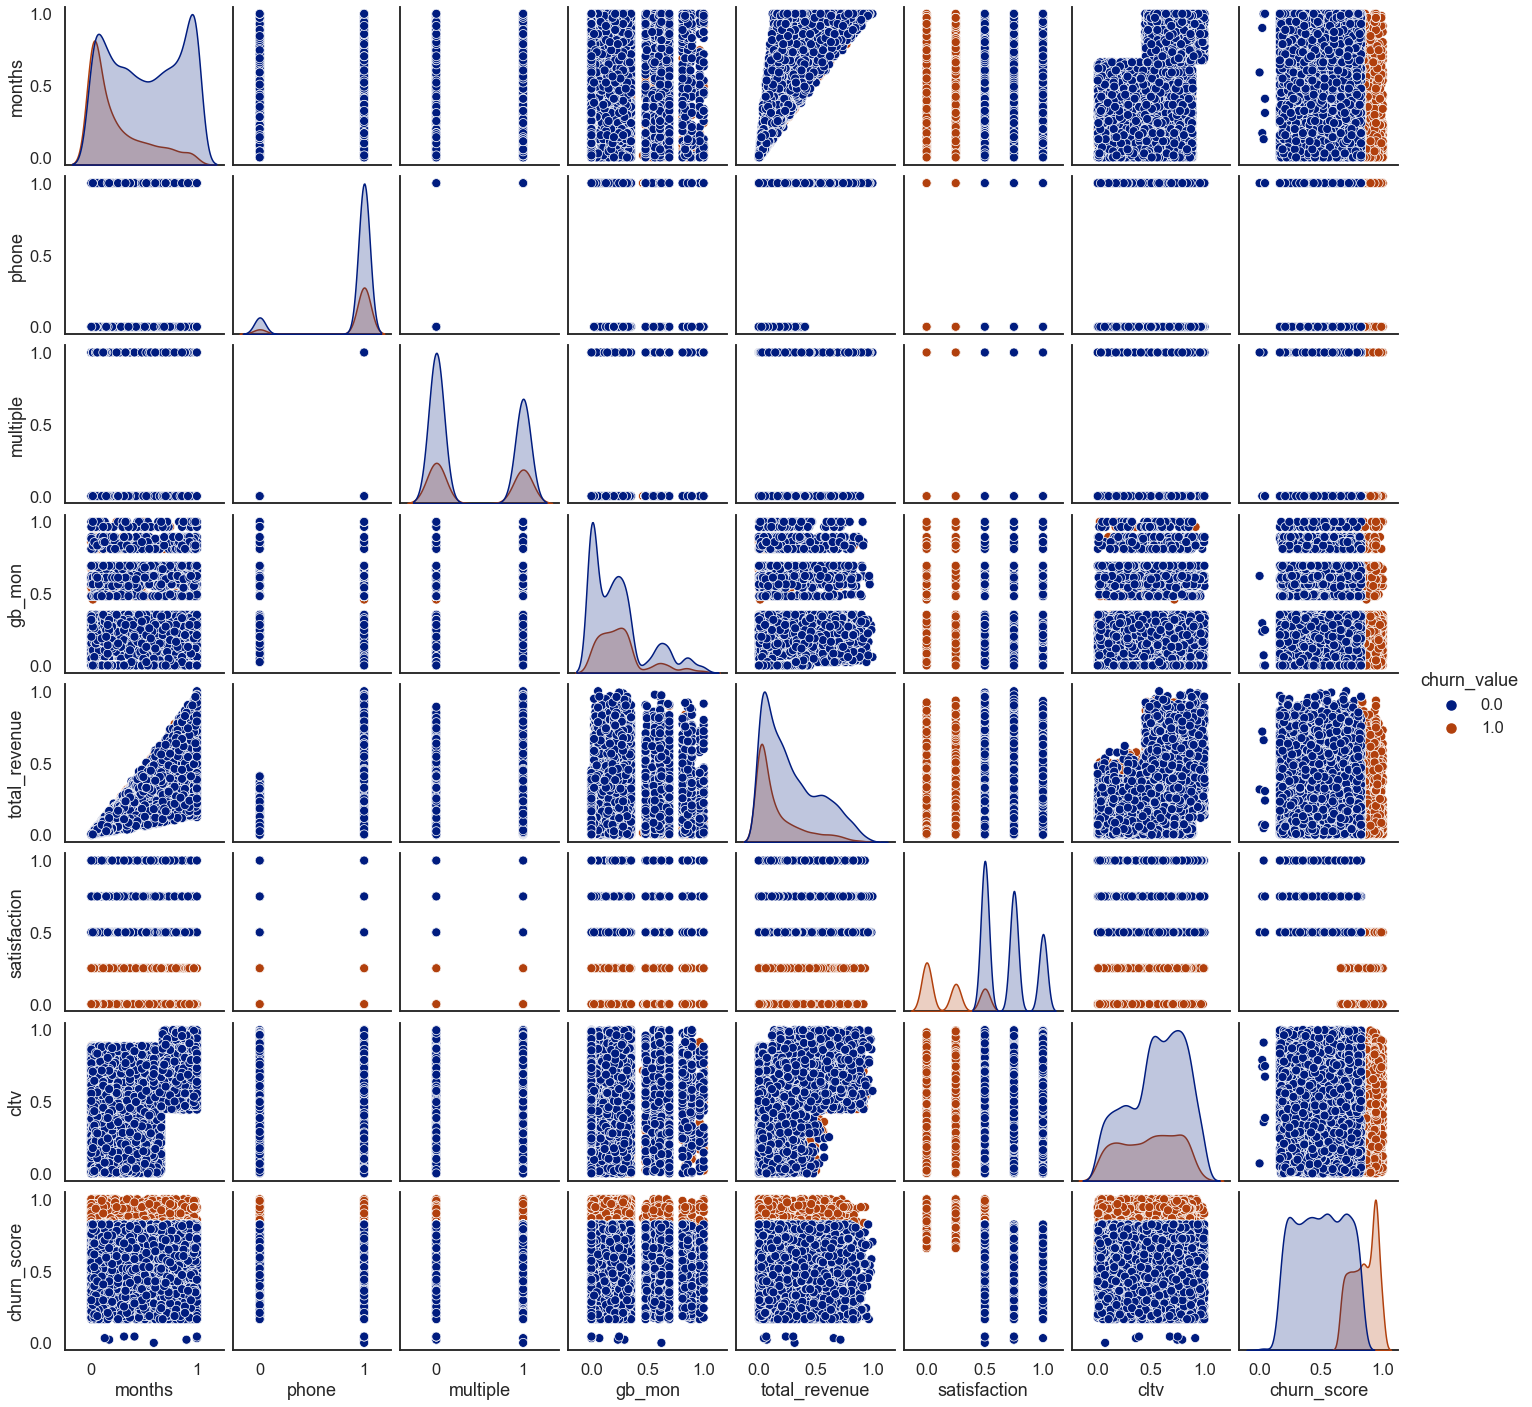

In [750]:
from colorsetup import colors, palette
sns.set_context('talk')
#sns.set_palette(palette)
sns.set_style('white')
#sns.set_context('notebook')
sns.set_palette('dark')
sns.pairplot(data[pp_features], hue = 'churn_value' )

**From this pairplot we see that following feature are correlated to the customers not churning:**

1) longer durations <br>
2) Customer from whom a large revenue has been collected <br>
3) customers with a high satisfaction score <br>
4) Customers with a high customer lifetime value. <br>

---

## Classifiers

In [751]:
pp_features = pp_features[:-1]

In [752]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 17)

In [753]:
y = data['churn_value']
X = data.drop('churn_value', axis = 1)

In [754]:
train_idx, test_idx = next(sss.split(X, y))

In [755]:
X_train = X.loc[train_idx]
y_train = y.loc[train_idx]

X_test = X.loc[test_idx]
y_test = y.loc[test_idx]

In [756]:
y_train.value_counts(normalize=True)

0.0    0.734686
1.0    0.265314
Name: churn_value, dtype: float64

In [757]:
y_test.value_counts(normalize=True)

0.0    0.734501
1.0    0.265499
Name: churn_value, dtype: float64

In [758]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

lr = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)
lr_l2 = LogisticRegressionCV(Cs = 100, cv = 2, solver = 'liblinear', penalty = 'l2').fit(X_train,y_train)

In [759]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=17)
dt = dt.fit(X_train, y_train)

In [760]:
coeff_labels = ['lr', 'l2', 'DT']
coeff_models = [lr, lr_l2, dt]

In [761]:
lr_l2.coef_

array([[-4.07954929e+00, -1.50509627e+00,  6.22550193e-01,
        -1.15525171e+00, -3.60735922e+00, -3.48904845e-01,
         5.92755921e-01, -2.67694181e-01,  1.77425807e-01,
        -1.31166542e+00,  4.38315699e-01, -1.54289914e+00,
         3.77289486e+00, -4.55393062e+01,  1.95351499e+01,
        -2.07999271e-01,  1.57467397e+00, -3.94423741e-01,
        -3.58647171e-02, -4.15248456e-01,  4.21622585e-01,
        -7.89095112e-01,  2.87598744e-01, -2.19313935e+00,
        -8.62834085e-01, -5.34669336e-01]])

In [762]:
coefficients = list()
for lab, mod in zip(coeff_labels[:-1], coeff_models[:-1]):
    coeffs = mod.coef_
    
    coeff_label = [lab]
    
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

,lr,l2
20,0.299945,0.421623
13,-10.756905,-45.539306
5,-0.248536,-0.348905
22,0.040778,0.287599
18,-0.087432,-0.035865
19,-0.400598,-0.415248
4,-1.856189,-3.607359
10,0.234108,0.438316
23,-1.084191,-2.193139
0,-1.553130,-4.079549


In [763]:
coefficients.set_index(X.columns).sort_values(by = 'lr')

,lr,l2
satisfaction,-10.756905,-45.539306
security,-1.856189,-3.607359
months,-1.553130,-4.079549
contract,-1.218375,-1.311665
internet_type_None,-1.084191,-2.193139
phone,-0.732534,-1.505096
gb_mon,-0.605726,-1.155252
payment_Credit Card,-0.542469,-0.862834
offer_Offer D,-0.400598,-0.415248
internet_type_DSL,-0.359073,-0.789095


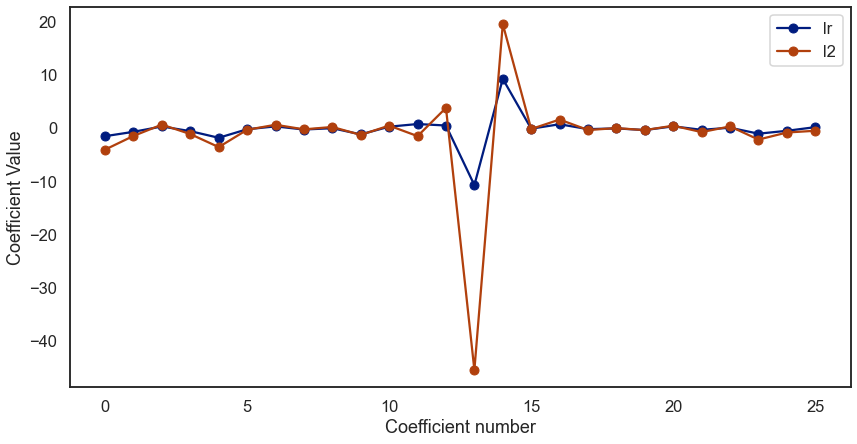

In [764]:
ax = coefficients.plot(marker='o', figsize=(14, 7))
    
ax.set(ylabel='Coefficient Value', xlabel = 'Coefficient number');

### END SOLUTION

In [765]:
### BEGIN SOLUTION
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l2', 'DT']
coeff_models = [lr, lr_l2, dt]

for lab,mod in zip(coeff_labels[:], coeff_models[:]):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    coeff_label = pd.MultiIndex(levels=[[lab], [0]], 
                                 codes=[[0], [0]])
    y_prob.append(pd.DataFrame(mod.predict_proba(X_test)))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head(10)

,lr,l2,DT
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,1.0,1.0
5,0.0,0.0,0.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,1.0,1.0,1.0
9,0.0,0.0,1.0


In [766]:
y_prob[0]

,0,0,0
0,0.997861,1.000000,1.0
1,0.999440,1.000000,1.0
2,0.959800,0.993968,1.0
3,0.999420,0.999999,1.0
4,0.061475,0.000006,0.0
...,...,...,...
2108,0.999989,1.000000,1.0
2109,0.981928,0.999997,1.0
2110,0.915888,0.971577,1.0
2111,0.999536,1.000000,1.0


In [769]:
### BEGIN SOLUTION
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels[:]:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    #auc = roc_auc_score(label_binarize(y_test, classes=[0]),
     #         label_binarize(y_pred[lab], classes=[0]), 
      #        average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [770]:
metrics

,lr,l2,DT
precision,0.974832,0.975794,0.971272
recall,0.974917,0.975864,0.971131
fscore,0.974852,0.975815,0.971188
accuracy,0.974917,0.975864,0.971131


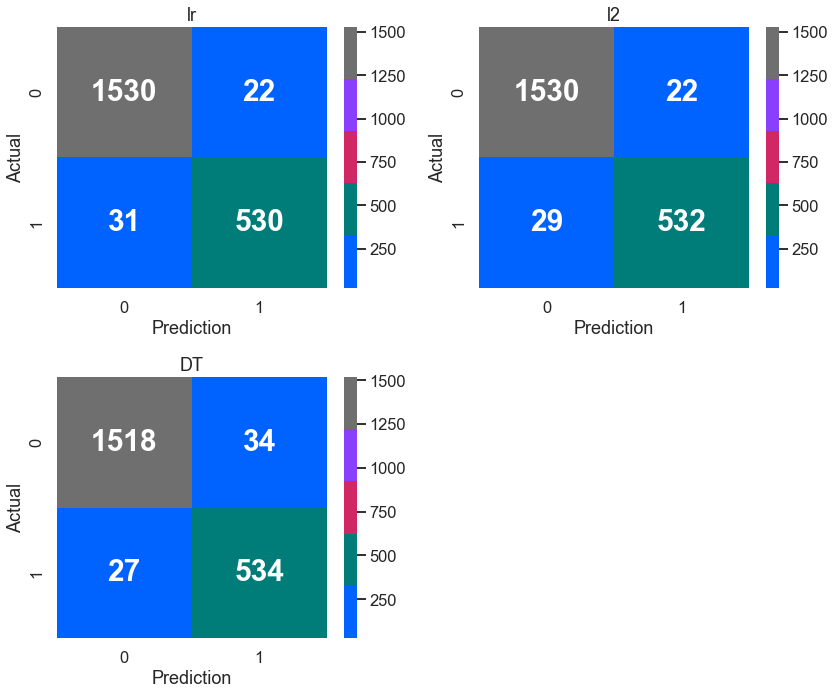

In [771]:
### BEGIN SOLUTION
sns.set_palette(sns.color_palette(colors))
sns.set_context('talk')
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')
#axList[-2].axis('off')

for ax,lab in zip(axList, coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d', cmap=colors, annot_kws={"size": 30, "weight": "bold"});
    ax.set(title=lab, xlabel = 'Prediction', ylabel = 'Actual');
    
plt.tight_layout()
### END SOLUTION

In [772]:
dt.tree_.node_count, dt.tree_.max_depth

(161, 18)

In [773]:
from sklearn.neighbors import KNeighborshborsClassifier
from sklearn.metrics import f1_score

In [774]:
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)

In [775]:


y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))


              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      1552
         1.0       0.83      0.76      0.79       561

    accuracy                           0.89      2113
   macro avg       0.87      0.85      0.86      2113
weighted avg       0.89      0.89      0.89      2113

Accuracy score:  0.89
F1 Score:  0.79


In [776]:
precision, recall, fscore, _ = score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
metrics = list()
metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy}, name = 'KNN'))
metrics = pd.concat(metrics, axis=1)

In [777]:
metrics

,KNN
precision,0.892577
recall,0.894463
fscore,0.893012
accuracy,0.894463


Text(0.5, 22.5, 'Prediction')

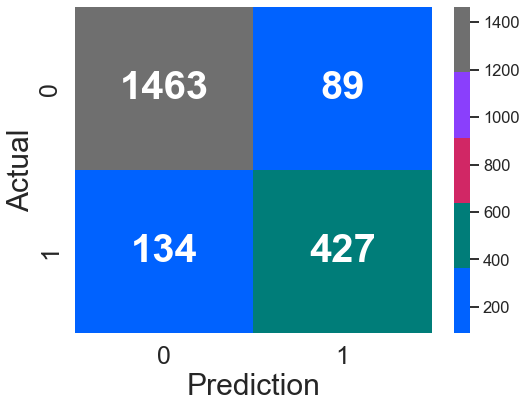

In [778]:
# Plot confusion matrix
sns.set_palette(sns.color_palette(colors))
_, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})  
labels = ['0', '1']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Actual', fontsize=30);
ax.set_xlabel('Prediction', fontsize=30)
### END SOLUTION

In [779]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=17, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [25, 50, 100, 150, 200, 300, 400, 600, 1000]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
25.0,0.021907
50.0,0.020487
100.0,0.019473
150.0,0.019675
200.0,0.018864
300.0,0.019067
400.0,0.018458
600.0,0.018864
1000.0,0.019270


In [780]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=17, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [25, 50, 100, 150, 200, 300, 400, 600, 1000]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

,oob
n_trees,
25.0,0.029209
50.0,0.025761
100.0,0.023732
150.0,0.023732
200.0,0.023935
300.0,0.023327
400.0,0.023124
600.0,0.023327
1000.0,0.023124


In [781]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
25.0,0.021907,0.029209
50.0,0.020487,0.025761
100.0,0.019473,0.023732
150.0,0.019675,0.023732
200.0,0.018864,0.023935
300.0,0.019067,0.023327
400.0,0.018458,0.023124
600.0,0.018864,0.023327
1000.0,0.019270,0.023124


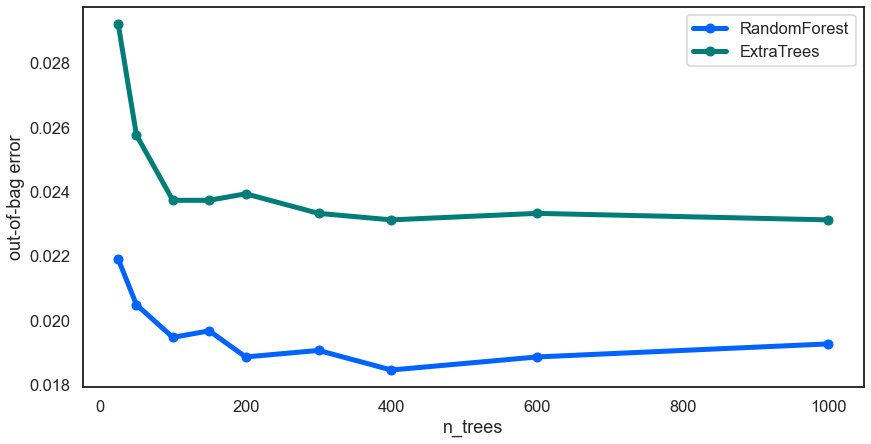

In [782]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [783]:
model = RF.set_params(n_estimators=400)

y_pred = model.predict(X_test)

In [784]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1552
         1.0       0.98      0.94      0.96       561

    accuracy                           0.98      2113
   macro avg       0.98      0.97      0.98      2113
weighted avg       0.98      0.98      0.98      2113

   accuracy  precision    recall        f1       auc
0   0.98107   0.983302  0.944742  0.963636  0.969471


In [785]:
precision, recall, fscore, _ = score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
metrics = list()
metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy}, name = 'Random Forest'))
metrics = pd.concat(metrics, axis=1)

In [786]:
metrics

,Random Forest
precision,0.981101
recall,0.981070
fscore,0.980947
accuracy,0.981070


Text(0.5, 40.5, 'Predicted')

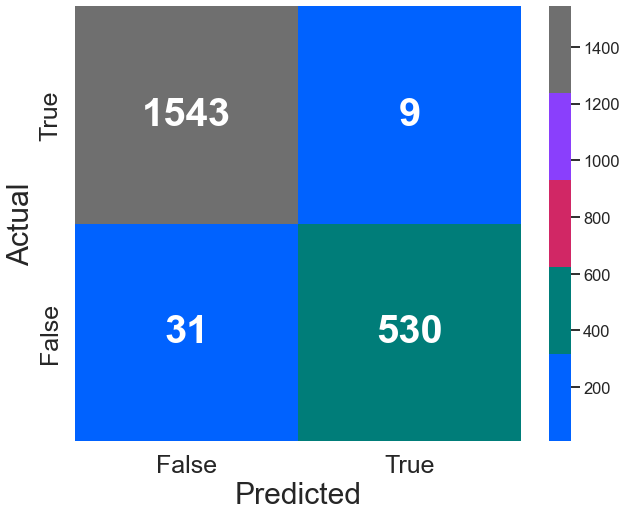

In [787]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors, annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Actual', fontsize=30);
ax.set_xlabel('Predicted', fontsize=30)

In [788]:
auc = roc_auc_score(y_test, y_pred, average='weighted')

In [789]:
auc

0.9694712819523311

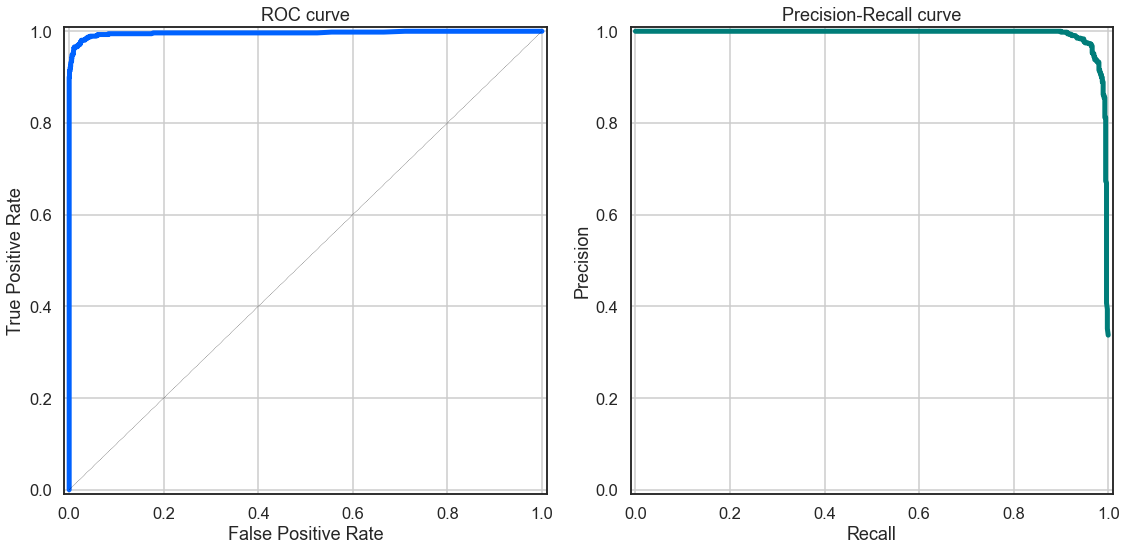

In [790]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, color=colors[0], linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, color=colors[1], linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

In [791]:
X.columns

Index(['months', 'phone', 'multiple', 'gb_mon', 'security', 'backup',
       'protection', 'support', 'unlimited', 'contract', 'paperless',
       'monthly', 'total_revenue', 'satisfaction', 'churn_score', 'cltv',
       'offer_Offer A', 'offer_Offer B', 'offer_Offer C', 'offer_Offer D',
       'offer_Offer E', 'internet_type_DSL', 'internet_type_Fiber Optic',
       'internet_type_None', 'payment_Credit Card', 'payment_Mailed Check'],
      dtype='object')

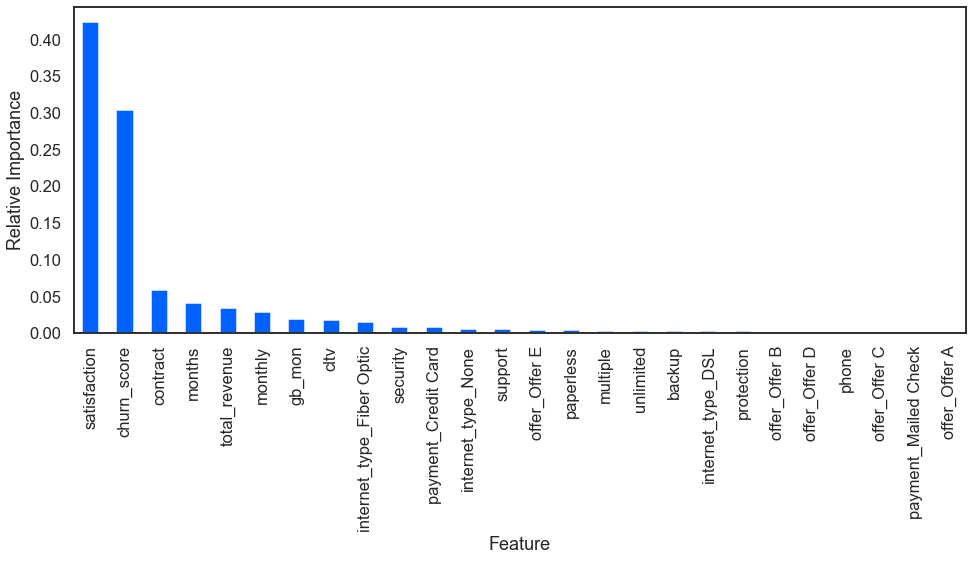

In [792]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(xlabel='Feature');

In [793]:
model.feature_importances_

array([0.04104432, 0.00135091, 0.00323841, 0.01969646, 0.00860061,
       0.00282903, 0.00222368, 0.00523729, 0.003115  , 0.05829954,
       0.00397566, 0.02919495, 0.03417934, 0.42283239, 0.30425574,
       0.01725299, 0.00053518, 0.00159568, 0.00116968, 0.00154597,
       0.00413045, 0.00255716, 0.0157171 , 0.00609749, 0.00832349,
       0.00100147])

In [794]:
### BEGIN SOLUTION
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

error_list = list()

# Iterate through various possibilities for number of trees
tree_list = [15, 25, 50, 100, 200, 400]
for n_trees in tree_list:
    
    # Initialize the gradient boost classifier
    GBC = GradientBoostingClassifier(max_features = 5, n_estimators=n_trees, random_state=17)

    # Fit the model
    print(f'Fitting model with {n_trees} trees')
    GBC.fit(X_train.values, y_train.values)
    y_pred = GBC.predict(X_test)

    # Get the error
    error = 1.0 - accuracy_score(y_test, y_pred)
    
    # Store it
    error_list.append(pd.Series({'n_trees': n_trees, 'error': error}))

error_df = pd.concat(error_list, axis=1).T.set_index('n_trees')

error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 400 trees


,error
n_trees,
15.0,0.044013
25.0,0.030762
50.0,0.019877
100.0,0.019404
200.0,0.019877
400.0,0.020823


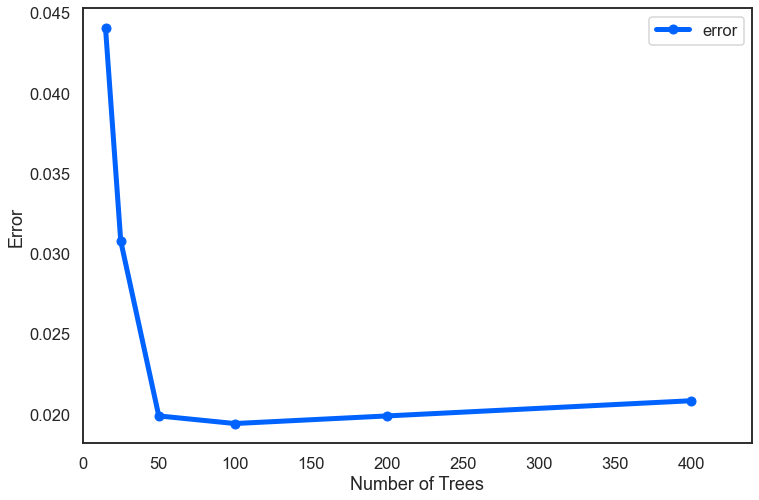

In [795]:
# Create the plot
ax = error_df.plot(marker='o', figsize=(12, 8), linewidth=5)

# Set parameters
ax.set(xlabel='Number of Trees', ylabel='Error')
ax.set_xlim(0, max(error_df.index)*1.1);
### END SOLUTION

In [796]:
GBC = GradientBoostingClassifier(max_features = 5, n_estimators=100, random_state=17)


GBC.fit(X_train.values, y_train.values)
y_pred = GBC.predict(X_test)


In [797]:
precision, recall, fscore, _ = score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
metrics = list()
metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy}, name = 'GBC'))
metrics = pd.concat(metrics, axis=1)

In [798]:
metrics

,GBC
precision,0.980541
recall,0.980596
fscore,0.980535
accuracy,0.980596


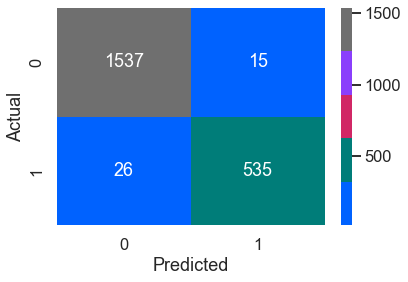

In [799]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap=colors)
ax.set(xlabel= 'Predicted', ylabel ='Actual');

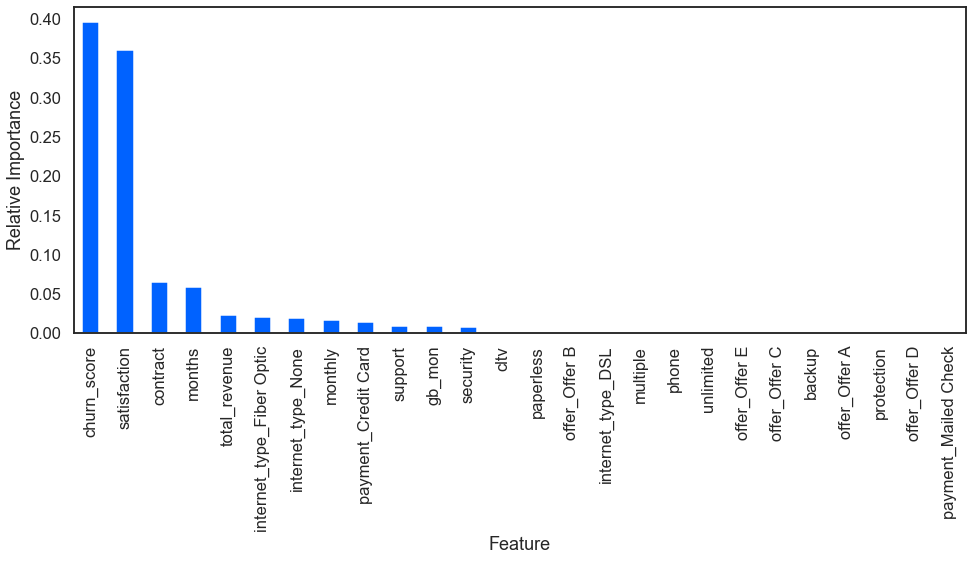

In [800]:
feature_imp = pd.Series(GBC.feature_importances_, index=X.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(xlabel='Feature');